In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PMFBY statistics.csv')

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)  # Show all rows

In [4]:
df.head(10)

,year,season,scheme,state,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.districtName,district.districtCode,district.scheme,district.grossPremium (lac.),district.nextLevelParams
0,2018,Kharif,WBCIS,ANDHRA PRADESH,530381,554393.0,260,898.02,427253.53,8589.30,23135.37,23135.37,67.99,31.96,0.05,7.15,3.58,54.00,35.27,15.21,64.60,20.19,63,11-02-2023 01:02 AM,Anantapur,553,2,54860.04,levelCode=553&levelNo=3&stateCode=28&year=2018...
1,2018,Kharif,WBCIS,ANDHRA PRADESH,32478,20405.0,13573,27.45,19028.48,666.72,428.02,428.02,75.30,24.67,0.03,5.09,1.85,34.30,58.76,12.79,75.58,11.63,57,11-02-2023 01:02 AM,Chittoor,554,2,1522.76,levelCode=554&levelNo=3&stateCode=28&year=2018...
2,2018,Kharif,WBCIS,ANDHRA PRADESH,80,92.0,0,0.20,121.44,6.07,1.82,1.82,65.22,34.78,0.00,0.00,0.00,8.70,91.30,8.70,23.91,67.39,18,11-02-2023 01:02 AM,East Godavari,545,2,9.71,levelCode=545&levelNo=3&stateCode=28&year=2018...
3,2018,Kharif,WBCIS,ANDHRA PRADESH,10077,10171.0,821,8.24,11767.03,588.35,199.32,199.32,71.22,28.68,0.10,3.27,3.05,48.28,45.40,12.62,74.09,13.29,53,11-02-2023 01:02 AM,Guntur,548,2,986.99,levelCode=548&levelNo=3&stateCode=28&year=2018...
4,2018,Kharif,WBCIS,ANDHRA PRADESH,97,98.0,0,0.12,164.42,8.22,4.11,4.11,63.27,36.73,0.00,2.04,0.00,47.96,50.00,40.82,44.90,14.28,6,11-02-2023 01:02 AM,Krishna,547,2,16.44,levelCode=547&levelNo=3&stateCode=28&year=2018...
5,2018,Kharif,WBCIS,ANDHRA PRADESH,53833,53193.0,2075,94.16,42385.75,848.78,1906.47,1906.47,73.03,26.85,0.12,6.22,2.96,55.17,35.65,17.21,64.21,18.58,48,11-02-2023 01:02 AM,Kurnool,552,2,4661.72,levelCode=552&levelNo=3&stateCode=28&year=2018...
6,2018,Kharif,WBCIS,ANDHRA PRADESH,3599,1139.0,2703,3.01,2825.57,141.28,29.69,29.69,73.92,26.08,0.00,3.33,0.57,26.34,69.76,13.59,79.98,6.43,47,11-02-2023 01:02 AM,Prakasam,549,2,200.66,levelCode=549&levelNo=3&stateCode=28&year=2018...
7,2018,Kharif,WBCIS,ANDHRA PRADESH,308,319.0,6,0.60,482.25,24.11,7.23,7.23,70.46,29.54,0.00,2.77,0.00,25.85,71.38,16.62,51.08,32.30,19,11-02-2023 01:02 AM,West Godavari,546,2,38.57,levelCode=546&levelNo=3&stateCode=28&year=2018...
8,2018,Kharif,WBCIS,ANDHRA PRADESH,91805,94943.0,545,129.97,65194.43,1317.89,3130.11,3130.11,68.48,31.48,0.04,4.53,1.51,30.02,63.94,15.00,68.78,16.22,42,11-02-2023 01:02 AM,Y.S.R.,551,2,7578.11,levelCode=551&levelNo=3&stateCode=28&year=2018...
9,2018,Kharif,WBCIS,CHHATTISGARH,238,39.0,312,0.19,143.58,7.18,13.71,13.71,86.89,13.11,0.00,3.70,17.95,67.24,11.11,5.13,84.33,10.54,7,11-02-2023 01:02 AM,Balod,904,2,34.60,levelCode=904&levelNo=3&stateCode=22&year=2018...


In [5]:
df.tail(10)

,year,season,scheme,state,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.districtName,district.districtCode,district.scheme,district.grossPremium (lac.),district.nextLevelParams
3627,2020,Rabi,PMFBY,ASSAM,24013,0.0,33073,16.06,10988.16,0.3411,603.25,317.31,72.26,27.65,0.09,5.54,6.20,13.57,74.69,8.54,85.32,6.14,5,11-02-2023 01:02 AM,Karimganj,317,4,920.90,levelCode=317&levelNo=3&stateCode=18&year=2020...
3628,2020,Rabi,PMFBY,ASSAM,41335,247.0,43792,38.46,33123.60,0.4404,195.44,801.22,65.76,34.21,0.03,1.15,11.05,3.26,84.54,93.04,6.88,0.08,4,11-02-2023 01:02 AM,Kokrajhar,300,4,997.10,levelCode=300&levelNo=3&stateCode=18&year=2020...
3629,2020,Rabi,PMFBY,ASSAM,40361,147.0,67179,29.00,20500.67,0.6418,226.70,496.52,79.10,20.84,0.06,3.48,13.61,13.45,69.46,18.25,81.34,0.41,7,11-02-2023 01:02 AM,Lakhimpur,307,4,723.86,levelCode=307&levelNo=3&stateCode=18&year=2020...
3630,2020,Rabi,PMFBY,ASSAM,20327,142.0,28922,19.40,15317.15,0.2904,385.91,540.63,81.30,18.63,0.07,3.54,5.97,7.08,83.41,24.44,74.23,1.33,5,11-02-2023 01:02 AM,Morigaon,304,4,926.83,levelCode=304&levelNo=3&stateCode=18&year=2020...
3631,2020,Rabi,PMFBY,ASSAM,114723,483.0,139774,109.89,92473.40,2.6700,575.14,3158.88,74.12,25.85,0.03,0.90,1.24,4.53,93.33,35.60,64.25,0.15,11,11-02-2023 01:02 AM,Nagaon,305,4,3736.69,levelCode=305&levelNo=3&stateCode=18&year=2020...
3632,2020,Rabi,PMFBY,ASSAM,27987,166.0,51119,16.65,11209.16,0.9187,64.40,220.11,56.41,43.54,0.05,0.62,2.48,4.48,92.42,29.34,70.21,0.45,7,11-02-2023 01:02 AM,Nalbari,323,4,285.43,levelCode=323&levelNo=3&stateCode=18&year=2020...
3633,2020,Rabi,PMFBY,ASSAM,4230,71.0,7155,2.11,1701.63,1.5600,5.01,71.09,73.53,26.43,0.04,0.17,0.24,2.96,96.63,22.53,75.10,2.37,7,11-02-2023 01:02 AM,Sivasagar,311,4,77.66,levelCode=311&levelNo=3&stateCode=18&year=2020...
3634,2020,Rabi,PMFBY,ASSAM,34865,388.0,44576,24.38,19404.17,0.7242,140.70,396.26,76.12,23.77,0.11,0.74,1.67,3.93,93.66,0.64,99.23,0.13,8,11-02-2023 01:02 AM,Sonitpur,306,4,537.68,levelCode=306&levelNo=3&stateCode=18&year=2020...
3635,2020,Rabi,PMFBY,ASSAM,9369,160.0,9474,9.00,11718.88,0.1061,317.09,619.31,75.13,24.82,0.05,0.24,3.06,7.06,89.64,4.00,93.28,2.72,4,11-02-2023 01:02 AM,Tinsukia,309,4,936.51,levelCode=309&levelNo=3&stateCode=18&year=2020...
3636,2020,Rabi,PMFBY,ASSAM,22754,147.0,30450,13.04,10294.37,4.5300,22.35,315.96,65.79,34.11,0.10,0.41,2.61,4.76,92.22,1.17,98.56,0.27,5,11-02-2023 01:02 AM,Udalguri,326,4,342.84,levelCode=326&levelNo=3&stateCode=18&year=2020...


In [6]:
df.shape

(3637, 29)

In [7]:
df.index

RangeIndex(start=0, stop=3637, step=1)

In [8]:
df.columns

Index(['year', 'season', 'scheme', 'state', 'district.farmerCount',
       'district.application.loanee', 'district.nonLoanee',
       'district.areaInsured (th.ha)', 'district.sumInsured (lac.)',
       'district.farmerShare (lac.)', 'district.goiShare (lac.)',
       'district.stateShare (lac.)', 'district.gender.male (%)',
       'district.gender.female (%)', 'district.gender.transgender (%)',
       'district.category.sc (%)', 'district.category.st (%)',
       'district.category.obc (%)', 'district.category.gen (%)',
       'district.type.marginal (%)', 'district.type.small (%)',
       'district.type.other (%)', 'district.iuCount', 'district.updatedAt',
       'district.districtName', 'district.districtCode', 'district.scheme',
       'district.grossPremium (lac.)', 'district.nextLevelParams'],
      dtype='object')

In [9]:
col = list(df.columns)
col

['year',
 'season',
 'scheme',
 'state',
 'district.farmerCount',
 'district.application.loanee',
 'district.nonLoanee',
 'district.areaInsured (th.ha)',
 'district.sumInsured (lac.)',
 'district.farmerShare (lac.)',
 'district.goiShare (lac.)',
 'district.stateShare (lac.)',
 'district.gender.male (%)',
 'district.gender.female (%)',
 'district.gender.transgender (%)',
 'district.category.sc (%)',
 'district.category.st (%)',
 'district.category.obc (%)',
 'district.category.gen (%)',
 'district.type.marginal (%)',
 'district.type.small (%)',
 'district.type.other (%)',
 'district.iuCount',
 'district.updatedAt',
 'district.districtName',
 'district.districtCode',
 'district.scheme',
 'district.grossPremium (lac.)',
 'district.nextLevelParams']

In [10]:
col1, col2 = 'district.districtName', 'district.districtCode'
newPos = 4

col1_data = df.pop(col1)
col2_data = df.pop(col2)
df.insert(newPos, col1, col1_data)
df.insert(newPos+1, col2, col2_data)

df

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
0,2018,Kharif,WBCIS,ANDHRA PRADESH,Anantapur,553,530381,554393.0,260,898.02,427253.53,8589.3000,23135.37,23135.37,67.99,31.96,0.05,7.15,3.58,54.00,35.27,15.21,64.60,20.19,63,11-02-2023 01:02 AM,2,54860.04,levelCode=553&levelNo=3&stateCode=28&year=2018...
1,2018,Kharif,WBCIS,ANDHRA PRADESH,Chittoor,554,32478,20405.0,13573,27.45,19028.48,666.7200,428.02,428.02,75.30,24.67,0.03,5.09,1.85,34.30,58.76,12.79,75.58,11.63,57,11-02-2023 01:02 AM,2,1522.76,levelCode=554&levelNo=3&stateCode=28&year=2018...
2,2018,Kharif,WBCIS,ANDHRA PRADESH,East Godavari,545,80,92.0,0,0.20,121.44,6.0700,1.82,1.82,65.22,34.78,0.00,0.00,0.00,8.70,91.30,8.70,23.91,67.39,18,11-02-2023 01:02 AM,2,9.71,levelCode=545&levelNo=3&stateCode=28&year=2018...
3,2018,Kharif,WBCIS,ANDHRA PRADESH,Guntur,548,10077,10171.0,821,8.24,11767.03,588.3500,199.32,199.32,71.22,28.68,0.10,3.27,3.05,48.28,45.40,12.62,74.09,13.29,53,11-02-2023 01:02 AM,2,986.99,levelCode=548&levelNo=3&stateCode=28&year=2018...
4,2018,Kharif,WBCIS,ANDHRA PRADESH,Krishna,547,97,98.0,0,0.12,164.42,8.2200,4.11,4.11,63.27,36.73,0.00,2.04,0.00,47.96,50.00,40.82,44.90,14.28,6,11-02-2023 01:02 AM,2,16.44,levelCode=547&levelNo=3&stateCode=28&year=2018...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,2020,Rabi,PMFBY,ASSAM,Nalbari,323,27987,166.0,51119,16.65,11209.16,0.9187,64.40,220.11,56.41,43.54,0.05,0.62,2.48,4.48,92.42,29.34,70.21,0.45,7,11-02-2023 01:02 AM,4,285.43,levelCode=323&levelNo=3&stateCode=18&year=2020...
3633,2020,Rabi,PMFBY,ASSAM,Sivasagar,311,4230,71.0,7155,2.11,1701.63,1.5600,5.01,71.09,73.53,26.43,0.04,0.17,0.24,2.96,96.63,22.53,75.10,2.37,7,11-02-2023 01:02 AM,4,77.66,levelCode=311&levelNo=3&stateCode=18&year=2020...
3634,2020,Rabi,PMFBY,ASSAM,Sonitpur,306,34865,388.0,44576,24.38,19404.17,0.7242,140.70,396.26,76.12,23.77,0.11,0.74,1.67,3.93,93.66,0.64,99.23,0.13,8,11-02-2023 01:02 AM,4,537.68,levelCode=306&levelNo=3&stateCode=18&year=2020...
3635,2020,Rabi,PMFBY,ASSAM,Tinsukia,309,9369,160.0,9474,9.00,11718.88,0.1061,317.09,619.31,75.13,24.82,0.05,0.24,3.06,7.06,89.64,4.00,93.28,2.72,4,11-02-2023 01:02 AM,4,936.51,levelCode=309&levelNo=3&stateCode=18&year=2020...


In [11]:
df['year'].unique()

array([2018, 2019, 2020])

In [12]:
df['season'].unique()

array(['Kharif', 'Rabi'], dtype=object)

In [13]:
df['scheme'].unique()

array(['WBCIS', 'PMFBY'], dtype=object)

In [14]:
df['state'].unique()

array(['ANDHRA PRADESH', 'CHHATTISGARH', 'HIMACHAL PRADESH', 'KARNATAKA',
       'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'RAJASTHAN',
       'TELANGANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'ASSAM', 'GOA', 'GUJARAT', 'HARYANA', 'JAMMU AND KASHMIR',
       'JHARKHAND', 'ODISHA', 'PUDUCHERRY', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'MANIPUR', 'MEGHALAYA', 'ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [15]:
df['state'] = df['state'].str.title().str.strip()

In [16]:
df['state'].unique()

array(['Andhra Pradesh', 'Chhattisgarh', 'Himachal Pradesh', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan',
       'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Assam', 'Goa', 'Gujarat', 'Haryana', 'Jammu And Kashmir',
       'Jharkhand', 'Odisha', 'Puducherry', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Manipur', 'Meghalaya', 'Andaman & Nicobar Islands'],
      dtype=object)

In [17]:
df['district.districtName'].unique()

array(['Anantapur', 'Chittoor', 'East Godavari', 'Guntur', 'Krishna',
       'Kurnool', 'Prakasam', 'West Godavari', 'Y.S.R.', 'Balod',
       'Baloda Bazar', 'Balrampur', 'Bastar', 'Bemetara', 'Bijapur',
       'Bilaspur', 'Dakshin Bastar Dantewada', 'Dhamtari', 'Durg',
       'Gariyaband', 'Janjgir - Champa', 'Jashpur', 'Kabeerdham',
       'Kondagaon', 'Korba', 'Koriya', 'Mahasamund', 'Mungeli',
       'Narayanpur', 'Raigarh', 'Raipur', 'Rajnandgaon', 'Sukma',
       'Surajpur', 'Surguja', 'Uttar Bastar Kanker', 'Chamba', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmaur', 'Solan', 'Bagalkot',
       'Ballari', 'Belagavi', 'Bengaluru Rural', 'Bengaluru Urban',
       'Bidar', 'ChamarajNagar', 'Chikkaballapur', 'Chikkamagaluru',
       'Chitradurga', 'DakshinaKannada', 'Davangere', 'Dharwad', 'Gadag',
       'Hasan', 'Haveri', 'Kalaburgi', 'Kodagu', 'Kolar', 'Koppal',
       'Mandya', 'Mysuru', 'Raichur', 'Ramanagara', 'Shivamogga',
       'Tumakuru', 'Udupi', 'UttarKannada', 'Vi

In [18]:
df.dtypes

,0
year,int64
season,object
scheme,object
state,object
district.districtName,object
district.districtCode,int64
district.farmerCount,int64
district.application.loanee,float64
district.nonLoanee,int64
district.areaInsured (th.ha),float64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3637 non-null   int64  
 1   season                           3637 non-null   object 
 2   scheme                           3637 non-null   object 
 3   state                            3637 non-null   object 
 4   district.districtName            3637 non-null   object 
 5   district.districtCode            3637 non-null   int64  
 6   district.farmerCount             3637 non-null   int64  
 7   district.application.loanee      3636 non-null   float64
 8   district.nonLoanee               3637 non-null   int64  
 9   district.areaInsured (th.ha)     3637 non-null   float64
 10  district.sumInsured (lac.)       3637 non-null   float64
 11  district.farmerShare (lac.)      3637 non-null   float64
 12  district.goiShare (l

In [20]:
df.isna().sum()

,0
year,0
season,0
scheme,0
state,0
district.districtName,0
district.districtCode,0
district.farmerCount,0
district.application.loanee,1
district.nonLoanee,0
district.areaInsured (th.ha),0


In [21]:
df[df['district.gender.male (%)'].isna()]

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
50,2018,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
789,2018,Rabi,WBCIS,Karnataka,Ballari,596497,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596497&levelNo=3&stateCode=29&year=2...
791,2018,Rabi,WBCIS,Karnataka,Bengaluru Rural,596499,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596499&levelNo=3&stateCode=29&year=2...
792,2018,Rabi,WBCIS,Karnataka,Bengaluru Urban,596500,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596500&levelNo=3&stateCode=29&year=2...
794,2018,Rabi,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2020,Rabi,WBCIS,Karnataka,Tumakuru,596521,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596521&levelNo=3&stateCode=29&year=2...
3506,2020,Rabi,WBCIS,Karnataka,Udupi,569,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=569&levelNo=3&stateCode=29&year=2020...
3507,2020,Rabi,WBCIS,Karnataka,UttarKannada,596523,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596523&levelNo=3&stateCode=29&year=2...
3508,2020,Rabi,WBCIS,Karnataka,Vijayapura,596524,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596524&levelNo=3&stateCode=29&year=2...


In [22]:
df[df['district.gender.male (%)'].isna()].head(30)

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
50,2018,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
789,2018,Rabi,WBCIS,Karnataka,Ballari,596497,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596497&levelNo=3&stateCode=29&year=2...
791,2018,Rabi,WBCIS,Karnataka,Bengaluru Rural,596499,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596499&levelNo=3&stateCode=29&year=2...
792,2018,Rabi,WBCIS,Karnataka,Bengaluru Urban,596500,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596500&levelNo=3&stateCode=29&year=2...
794,2018,Rabi,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
795,2018,Rabi,WBCIS,Karnataka,Chikkaballapur,596503,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596503&levelNo=3&stateCode=29&year=2...
796,2018,Rabi,WBCIS,Karnataka,Chikkamagaluru,596504,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596504&levelNo=3&stateCode=29&year=2...
797,2018,Rabi,WBCIS,Karnataka,Chitradurga,566,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=566&levelNo=3&stateCode=29&year=2018...
798,2018,Rabi,WBCIS,Karnataka,DakshinaKannada,596506,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596506&levelNo=3&stateCode=29&year=2...
799,2018,Rabi,WBCIS,Karnataka,Davangere,596507,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596507&levelNo=3&stateCode=29&year=2...


In [23]:
df[df['district.gender.male (%)'].isna()].tail(30)

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
2557,2019,Rabi,PMFBY,Karnataka,Kodagu,576,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,14-04-2021 02:04 AM,4,0.0,levelCode=576&levelNo=3&stateCode=29&year=2019...
2558,2019,Rabi,PMFBY,Karnataka,Kolar,581,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,14-04-2021 02:04 AM,4,0.0,levelCode=581&levelNo=3&stateCode=29&year=2019...
2563,2019,Rabi,PMFBY,Karnataka,Ramanagara,584,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,14-04-2021 02:04 AM,4,0.0,levelCode=584&levelNo=3&stateCode=29&year=2019...
2565,2019,Rabi,PMFBY,Karnataka,Tumakuru,596521,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,14-04-2021 02:04 AM,4,0.0,levelCode=596521&levelNo=3&stateCode=29&year=2...
2566,2019,Rabi,PMFBY,Karnataka,Udupi,569,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,4,0.0,levelCode=569&levelNo=3&stateCode=29&year=2019...
2567,2019,Rabi,PMFBY,Karnataka,UttarKannada,596523,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,14-04-2021 02:04 AM,4,0.0,levelCode=596523&levelNo=3&stateCode=29&year=2...
2924,2020,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
2938,2020,Kharif,WBCIS,Karnataka,Mandya,573,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=573&levelNo=3&stateCode=29&year=2020...
2939,2020,Kharif,WBCIS,Karnataka,Mysuru,596517,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596517&levelNo=3&stateCode=29&year=2...
3480,2020,Rabi,WBCIS,Karnataka,Bagalkot,556,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=556&levelNo=3&stateCode=29&year=2020...


In [24]:
df[(df['district.gender.male (%)'].isna()) & (df['state'] == 'Karnataka')]

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
50,2018,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
789,2018,Rabi,WBCIS,Karnataka,Ballari,596497,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596497&levelNo=3&stateCode=29&year=2...
791,2018,Rabi,WBCIS,Karnataka,Bengaluru Rural,596499,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596499&levelNo=3&stateCode=29&year=2...
792,2018,Rabi,WBCIS,Karnataka,Bengaluru Urban,596500,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596500&levelNo=3&stateCode=29&year=2...
794,2018,Rabi,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,2020,Rabi,WBCIS,Karnataka,Tumakuru,596521,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596521&levelNo=3&stateCode=29&year=2...
3506,2020,Rabi,WBCIS,Karnataka,Udupi,569,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=569&levelNo=3&stateCode=29&year=2020...
3507,2020,Rabi,WBCIS,Karnataka,UttarKannada,596523,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596523&levelNo=3&stateCode=29&year=2...
3508,2020,Rabi,WBCIS,Karnataka,Vijayapura,596524,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596524&levelNo=3&stateCode=29&year=2...


In [25]:
df[(df['district.gender.male (%)'].isna()) & (df['state'] == 'Karnataka') & (df['district.districtName'] == 'ChamarajNagar')]

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
50,2018,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
794,2018,Rabi,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
1550,2019,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
2924,2020,Kharif,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...
3486,2020,Rabi,WBCIS,Karnataka,ChamarajNagar,596502,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.0,levelCode=596502&levelNo=3&stateCode=29&year=2...


In [26]:
df[(df['state'] == 'Karnataka') & (df['district.districtName'] == 'Udupi')]

,year,season,scheme,state,district.districtName,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.updatedAt,district.scheme,district.grossPremium (lac.),district.nextLevelParams
70,2018,Kharif,WBCIS,Karnataka,Udupi,569,2981,2977.0,4,0.0,0.0108,0.0005,0.0019,0.0019,63.64,36.36,0.0,0.00,1.03,19.59,79.38,37.37,52.53,10.10,300,14-04-2021 02:04 AM,2,0.00,levelCode=569&levelNo=3&stateCode=29&year=2018...
396,2018,Kharif,PMFBY,Karnataka,Udupi,569,4172,4160.0,12,0.0,0.0032,0.0001,0.0000,0.0000,57.58,42.42,0.0,0.00,0.00,6.12,93.88,3.06,90.82,6.12,254,14-04-2021 02:04 AM,4,0.00,levelCode=569&levelNo=3&stateCode=29&year=2018...
814,2018,Rabi,WBCIS,Karnataka,Udupi,569,0,0.0,0,0.0,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.00,levelCode=569&levelNo=3&stateCode=29&year=2018...
1156,2018,Rabi,PMFBY,Karnataka,Udupi,569,5,5.0,0,0.0,0.0000,0.0000,0.0000,0.0000,100.00,0.00,0.0,0.00,0.00,0.00,100.00,0.00,100.00,0.00,92,14-04-2021 02:04 AM,4,0.00,levelCode=569&levelNo=3&stateCode=29&year=2018...
1570,2019,Kharif,WBCIS,Karnataka,Udupi,569,5481,5302.0,179,0.0,0.0194,0.0010,0.0026,0.0026,64.65,35.35,-0.0,1.01,3.03,23.23,72.73,35.71,51.02,13.27,262,14-04-2021 02:04 AM,2,0.01,levelCode=569&levelNo=3&stateCode=29&year=2019...
1873,2019,Kharif,PMFBY,Karnataka,Udupi,569,3973,3448.0,525,0.0,0.0031,0.0001,0.0000,0.0000,54.55,45.45,0.0,0.00,1.01,15.15,83.84,12.24,74.49,13.27,163,14-04-2021 02:04 AM,4,0.00,levelCode=569&levelNo=3&stateCode=29&year=2019...
2566,2019,Rabi,PMFBY,Karnataka,Udupi,569,0,0.0,0,0.0,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,4,0.00,levelCode=569&levelNo=3&stateCode=29&year=2019...
2944,2020,Kharif,WBCIS,Karnataka,Udupi,569,5663,5512.0,151,0.0,0.0202,0.0010,0.0025,0.0049,65.66,34.34,0.0,1.03,4.12,18.56,76.29,34.69,54.08,11.23,273,14-04-2021 02:04 AM,2,0.01,levelCode=569&levelNo=3&stateCode=29&year=2020...
3141,2020,Kharif,PMFBY,Karnataka,Udupi,569,2386,2310.0,76,0.0,0.0016,0.0000,0.0002,0.0002,52.53,47.47,0.0,0.00,1.01,24.24,74.75,10.20,85.71,4.09,163,14-04-2021 02:04 AM,4,0.00,levelCode=569&levelNo=3&stateCode=29&year=2020...
3506,2020,Rabi,WBCIS,Karnataka,Udupi,569,0,0.0,0,0.0,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14-04-2021 02:04 AM,2,0.00,levelCode=569&levelNo=3&stateCode=29&year=2020...


In [27]:
df.dropna(inplace=True)

In [28]:
df.isna().sum()

,0
year,0
season,0
scheme,0
state,0
district.districtName,0
district.districtCode,0
district.farmerCount,0
district.application.loanee,0
district.nonLoanee,0
district.areaInsured (th.ha),0


In [29]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3632,False
3633,False
3634,False
3635,False


In [30]:
df.duplicated().sum()

0

# *1. Correlation Study*

In [31]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,year,district.districtCode,district.farmerCount,district.application.loanee,district.nonLoanee,district.areaInsured (th.ha),district.sumInsured (lac.),district.farmerShare (lac.),district.goiShare (lac.),district.stateShare (lac.),district.gender.male (%),district.gender.female (%),district.gender.transgender (%),district.category.sc (%),district.category.st (%),district.category.obc (%),district.category.gen (%),district.type.marginal (%),district.type.small (%),district.type.other (%),district.iuCount,district.scheme,district.grossPremium (lac.)
year,1.000000,0.019943,-0.007098,0.079529,0.025689,0.023602,0.017673,0.035152,0.058495,0.062702,-0.025791,0.028672,-0.040725,-0.052686,-0.000640,0.002440,0.012603,0.044418,0.011412,-0.049050,-0.005088,-0.047241,0.059065
district.districtCode,0.019943,1.000000,-0.020254,-0.054257,-0.013538,-0.059001,-0.089993,-0.087780,-0.059669,-0.060119,-0.049662,0.051561,-0.021371,-0.058743,-0.076911,-0.116066,0.166466,0.010338,-0.117259,0.119331,0.136774,-0.032308,-0.064101
district.farmerCount,-0.007098,-0.020254,1.000000,0.577610,0.713656,0.510698,0.834232,0.757243,0.761086,0.766005,-0.042718,0.043549,-0.005844,0.026568,-0.098170,0.064789,0.004283,-0.071842,0.092972,-0.042163,0.299041,0.292536,0.777825
district.application.loanee,0.079529,-0.054257,0.577610,1.000000,0.080762,0.413302,0.661555,0.552193,0.504918,0.512440,0.048080,-0.049376,0.012219,0.061307,-0.052474,0.203411,-0.153708,-0.047331,0.003976,0.034672,0.340031,0.254516,0.523431
district.nonLoanee,0.025689,-0.013538,0.713656,0.080762,1.000000,0.326213,0.521115,0.550027,0.654284,0.650313,-0.087439,0.089127,-0.011773,-0.009071,-0.056687,-0.029436,0.065814,-0.072544,0.121475,-0.072662,0.001123,0.119092,0.653866
district.areaInsured (th.ha),0.023602,-0.059001,0.510698,0.413302,0.326213,1.000000,0.576976,0.561925,0.537507,0.538102,0.017138,-0.017872,0.008602,0.039662,-0.046056,0.044763,-0.017537,-0.015772,-0.006563,0.020154,0.145050,0.094669,0.550934
district.sumInsured (lac.),0.017673,-0.089993,0.834232,0.661555,0.521115,0.576976,1.000000,0.868697,0.850860,0.868497,-0.041752,0.041646,0.008646,0.034788,-0.098942,0.135745,-0.057645,-0.084983,0.051651,0.013720,0.259177,0.254337,0.877653
district.farmerShare (lac.),0.035152,-0.087780,0.757243,0.552193,0.550027,0.561925,0.868697,1.000000,0.838256,0.811561,-0.017771,0.017398,0.008819,0.032396,-0.088737,0.147342,-0.073751,-0.106586,0.055960,0.026827,0.199690,0.200776,0.859734
district.goiShare (lac.),0.058495,-0.059669,0.761086,0.504918,0.654284,0.537507,0.850860,0.838256,1.000000,0.988715,-0.044647,0.044535,0.009230,0.033665,-0.073241,0.124347,-0.065066,-0.093501,0.042002,0.031261,0.126816,0.156258,0.996662
district.stateShare (lac.),0.062702,-0.060119,0.766005,0.512440,0.650313,0.538102,0.868497,0.811561,0.988715,1.000000,-0.053127,0.053155,0.008454,0.030347,-0.074831,0.112833,-0.053319,-0.091252,0.046720,0.024264,0.126540,0.152710,0.994028


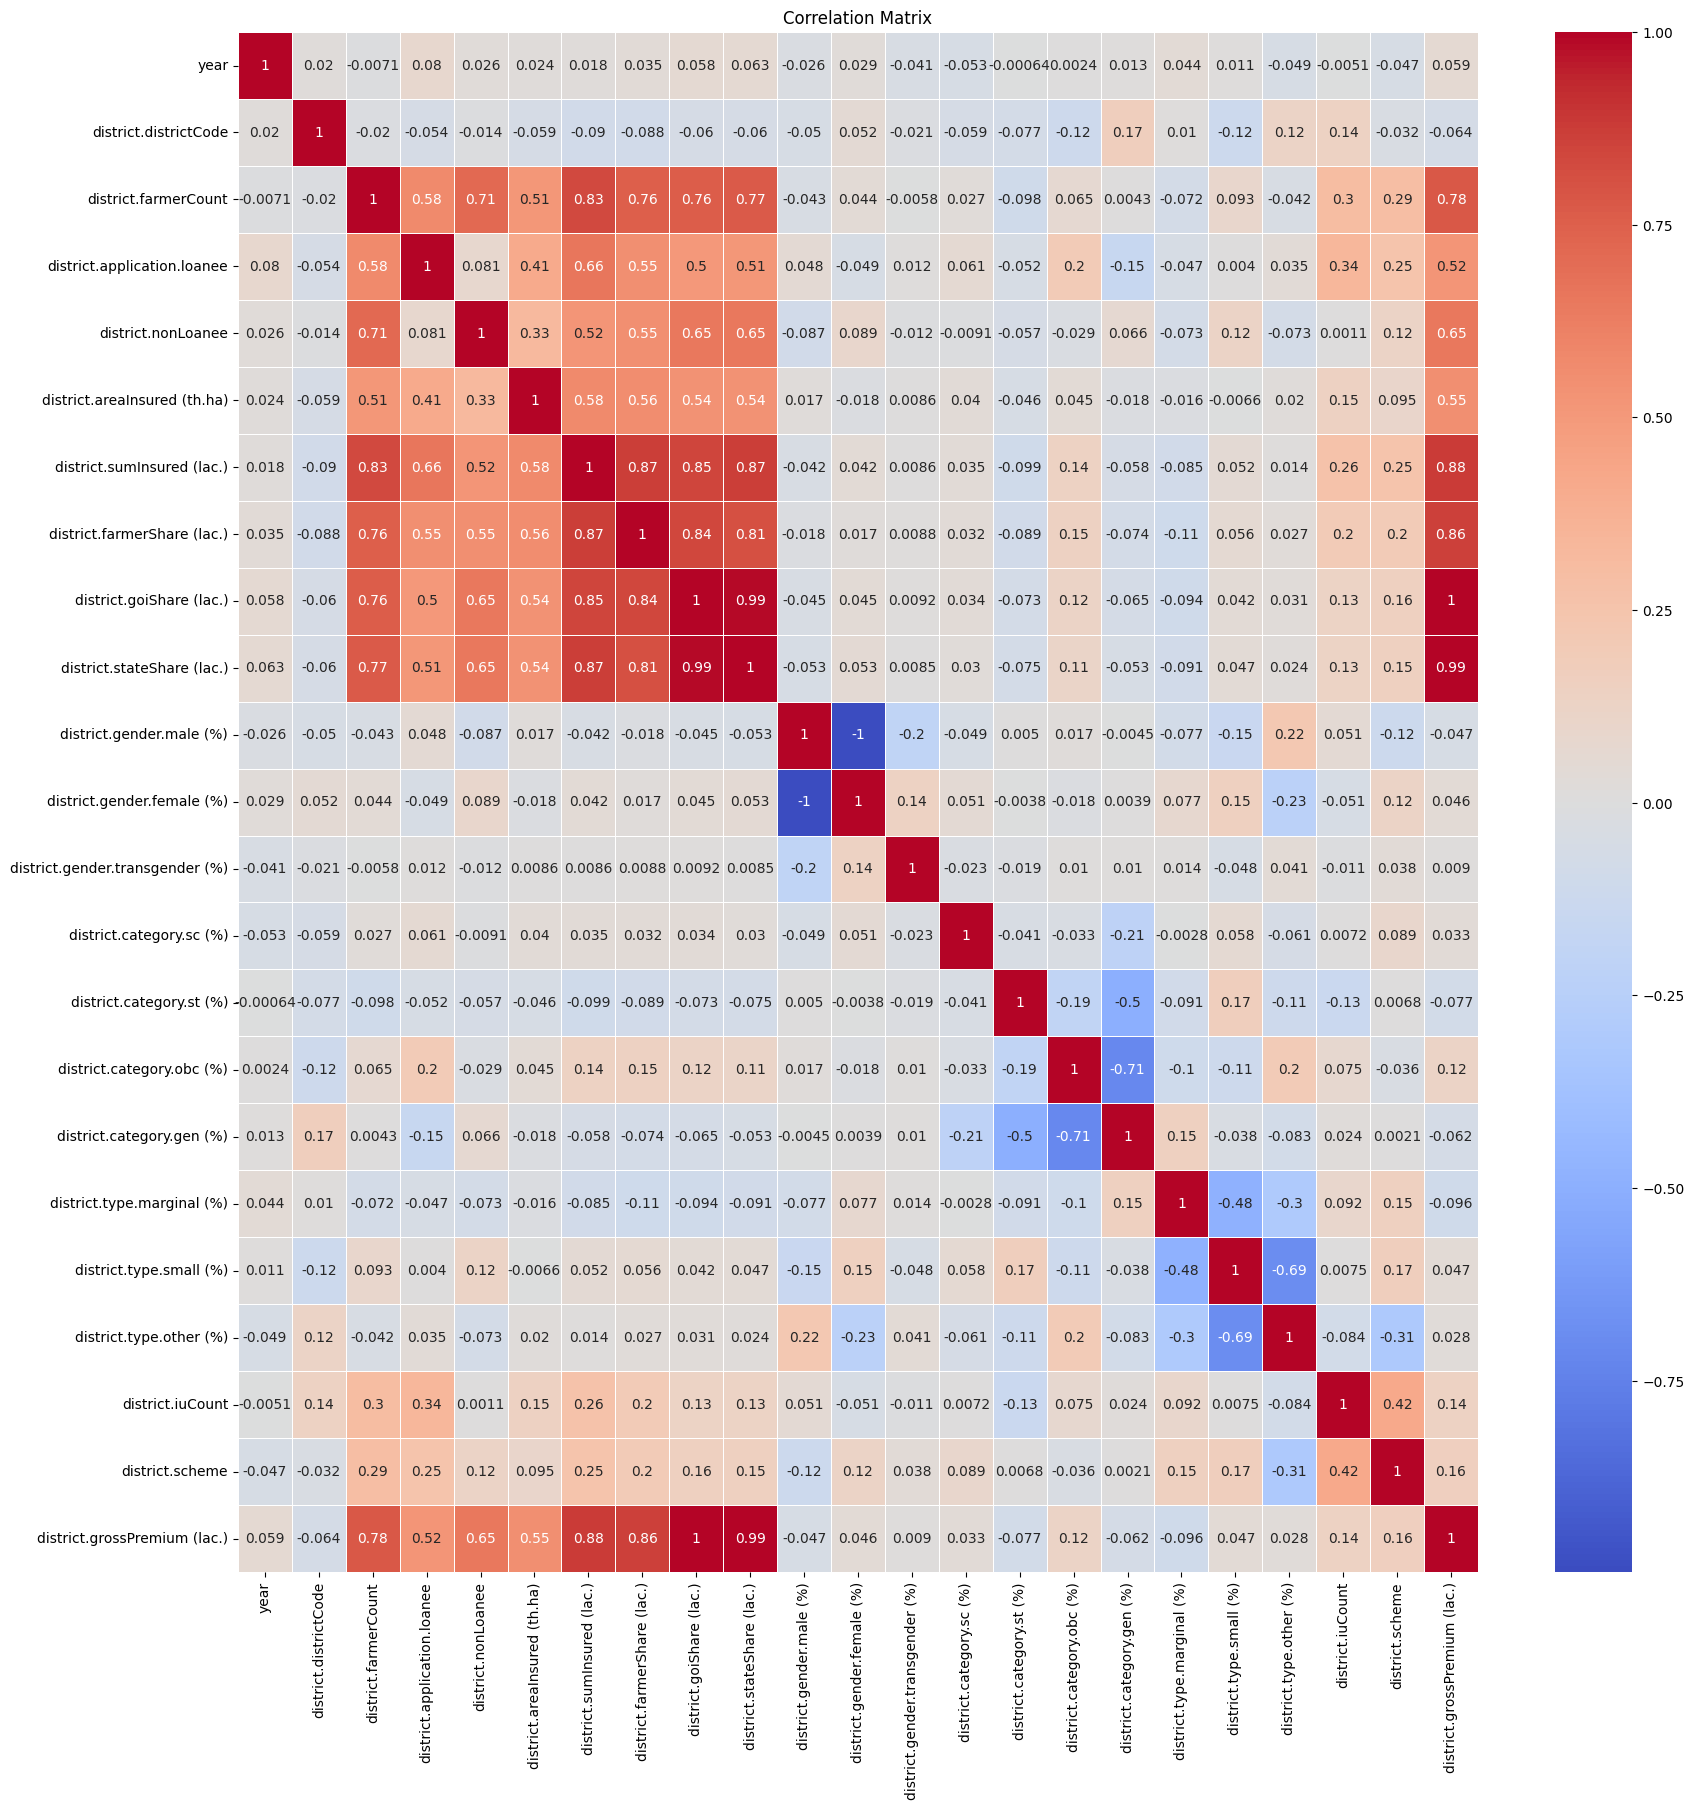

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
## Summarize the highest and lowest correlations
#strongest_correlations = correlation_matrix.unstack().sort_values(ascending=False)
#strongest_correlations = strongest_correlations[strongest_correlations < 1]  # Exclude self-correlation

## Extract top positive and negative correlations
#top_positive_correlations = strongest_correlations.head(10)
#top_negative_correlations = strongest_correlations.tail(10)
#
#top_positive_correlations, top_negative_correlations

# *2. Find the State that has more Farmers and least number of Farmer*

In [ ]:
def state_farmerCount(season_name, years):

    if years == 'all' and season_name == 'all':
      state_data = df
    elif years == 'all' and season_name != 'all':
      state_data = df[df['season'].isin(season_name)]
    elif years != 'all' and season_name == 'all':
      state_data = df[df['year'].isin(years)]
    else:
      state_data = df[(df['year'].isin(years)) & (df['season'].isin(season_name))]

    if state_data.empty:
      return state_data

    result = state_data.groupby(['state'])['district.farmerCount'].sum().sort_values(ascending=False)

    result = result.reset_index().rename(columns={'state': 'State', 'district.farmerCount': 'Total Farmers'})
    return result


season_name = input("Enter the season name: ")
year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

totalFarmer = state_farmerCount(season_name, years)
print(type(totalFarmer))
print(totalFarmer)

print("State with max farmers:")
print(totalFarmer.loc[totalFarmer['Total Farmers'].idxmax()])

print("State with min farmers:")
print(totalFarmer.loc[totalFarmer['Total Farmers'].idxmin()])


Enter the season name: all
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
                        State  Total Farmers
0                 Maharashtra       17723648
1              Madhya Pradesh       13429144
2                   Rajasthan       11238657
3               Uttar Pradesh       11138269
4                   Karnataka        6177804
5                      Odisha        5503024
6              Andhra Pradesh        4280659
7                Chhattisgarh        4182663
8                 West Bengal        3964571
9                     Haryana        3361944
10                 Tamil Nadu        2680408
11                      Assam        2269003
12                  Jharkhand        1948622
13                  Telangana        1700114
14           Himachal Pradesh         690475
15                Uttarakhand         478770
16                    Tripura         208097
17                     Kerala         151187
18          Jammu And Kashm

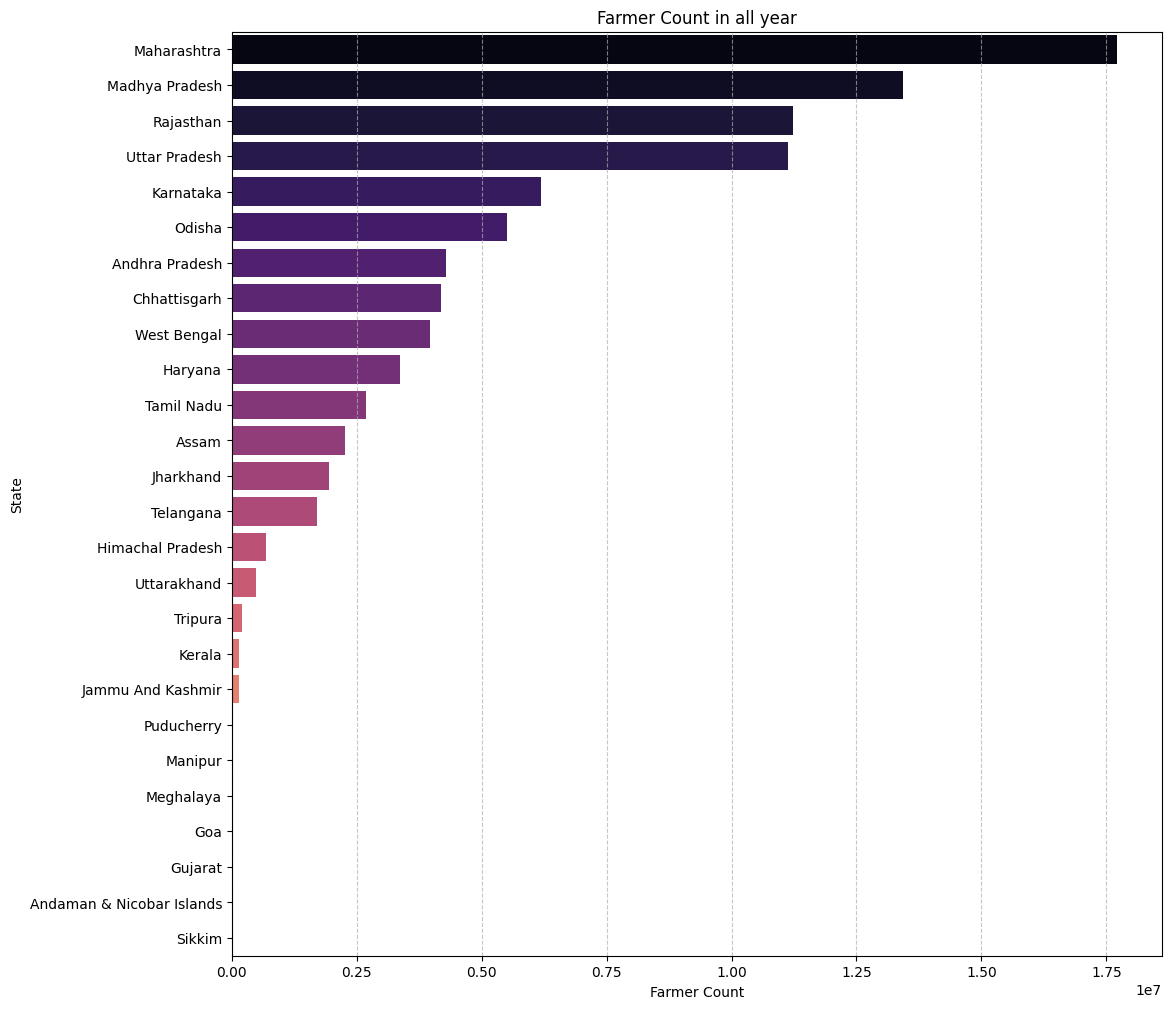

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x='Total Farmers', y='State', data=totalFarmer, hue='State', palette='magma')

plt.xlabel('Farmer Count')
plt.ylabel('State')
plt.title(f'Farmer Count in {year} year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# *3. Find the State that has more loanee Farmers and least number of loanee Farmer*

In [ ]:
def state_loaneeCount(season_name, years):

    if years == 'all' and season_name == 'all':
      state_data = df
    elif years == 'all' and season_name != 'all':
      state_data = df[df['season'].isin(season_name)]
    elif years != 'all' and season_name == 'all':
      state_data = df[df['year'].isin(years)]
    else:
      state_data = df[(df['year'].isin(years)) & (df['season'].isin(season_name))]

    if state_data.empty:
      return state_data

    result = state_data.groupby(['state'])['district.application.loanee'].sum().sort_values(ascending=False)

    result = result.reset_index().rename(columns={'state': 'State', 'district.application.loanee': 'Total Loanee'})
    return result


season_name = input("Enter the season name: ")
year = input("Enter the years (comma-separated) or type 'all': ")

if year.lower() == "all":
    years = "all"
else:
    years = list(map(int, year.split(",")))

if season_name.lower() == "all":
    season_name = "all"
else:
    season_name = season_name.split(",")

totalLoanee = state_loaneeCount(season_name, years)
print(type(totalLoanee))
print(totalLoanee)

print("State with max Loanee:")
print(totalLoanee.loc[totalLoanee['Total Loanee'].idxmax()])

print("State with min Loanee:")
print(totalLoanee.loc[totalLoanee['Total Loanee'].idxmin()])


Enter the season name: all
Enter the years (comma-separated) or type 'all': all
<class 'pandas.core.frame.DataFrame'>
                        State  Total Loanee
0                   Rajasthan    22569600.0
1              Madhya Pradesh    19441865.0
2               Uttar Pradesh    12737511.0
3                      Odisha    12482621.0
4                Chhattisgarh     9175941.0
5                 Maharashtra     5187645.0
6              Andhra Pradesh     4482729.0
7                     Haryana     3995309.0
8                 West Bengal     2898523.0
9                   Karnataka     2356441.0
10                  Telangana     1582410.0
11                 Tamil Nadu     1527058.0
12           Himachal Pradesh      718544.0
13                Uttarakhand      419756.0
14                  Jharkhand      387083.0
15          Jammu And Kashmir      152270.0
16                     Kerala      135779.0
17                      Assam       82555.0
18                    Tripura       14961.0
19

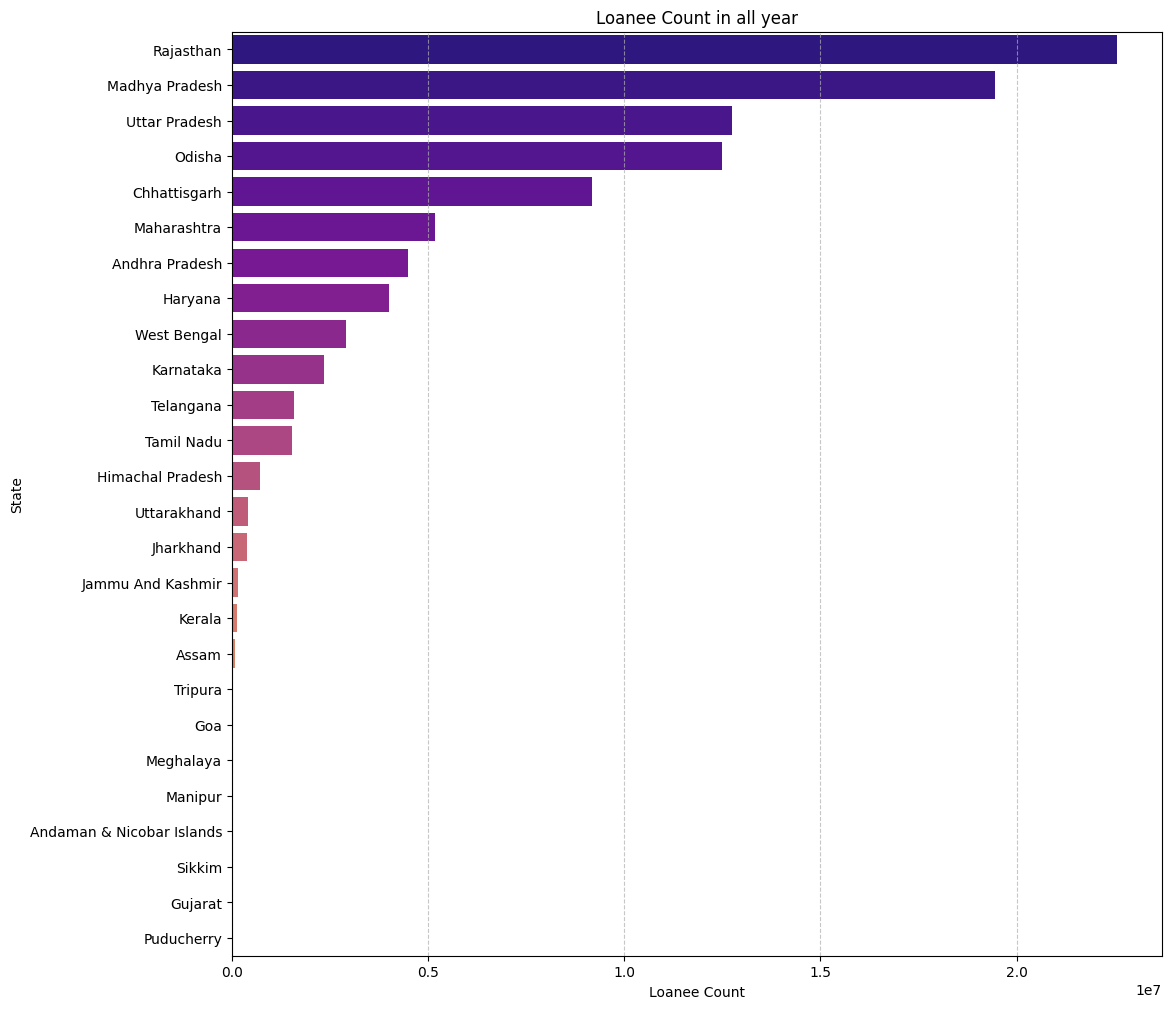

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x='Total Loanee', y='State', data=totalLoanee, hue='State', palette='plasma')

plt.xlabel('Loanee Count')
plt.ylabel('State')
plt.title(f'Loanee Count in {year} year')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# *4. Find the most area insured district*

In [ ]:
df.loc[df['district.areaInsured (th.ha)'].idxmax()]

,2246
year,2019
season,Rabi
scheme,WBCIS
state,Himachal Pradesh
district.districtName,Shimla
district.districtCode,33
district.farmerCount,40842
district.application.loanee,45542.0
district.nonLoanee,3
district.areaInsured (th.ha),3777.4


In [ ]:
# Load the shapefile or GeoJSON (India States/Districts)
geo_data = gpd.read_file("india_states.geojson")  # Replace with actual file

# Load the farmer data (Assume a CSV file with columns: 'State' and 'Num_Farmers')
farmer_data = pd.read_csv("farmers_data.csv")  # Replace with actual file

# Ensure matching column names for merging
geo_data.rename(columns={"state_name": "State"}, inplace=True)  # Adjust based on dataset

# Merge datasets on the 'State' column
merged_data = geo_data.merge(farmer_data, on="State", how="left")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column="Num_Farmers", cmap="YlGnBu", linewidth=0.8, edgecolor="black",
                 legend=True, ax=ax, legend_kwds={"label": "Number of Farmers"})

plt.title("Number of Farmers per State in India", fontsize=14)
plt.axis("off")  # Hide axes
plt.show()
